<a href="https://colab.research.google.com/github/DebDawg/Neural_Networks/blob/main/tensor_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl

In [ ]:
import tensorflow as tf

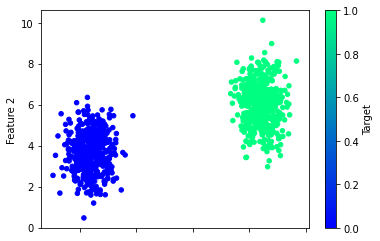

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.3536 - accuracy: 0.0507
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2998 - accuracy: 0.0533
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2506 - accuracy: 0.0573
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2048 - accuracy: 0.0667
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1618 - accuracy: 0.0747
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1228 - accuracy: 0.0760
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0872 - accuracy: 0.0840
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0539 - accuracy: 0.0893
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0229 - accuracy: 0.1000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9945 - accuracy: 0.1133
Epoch 11/

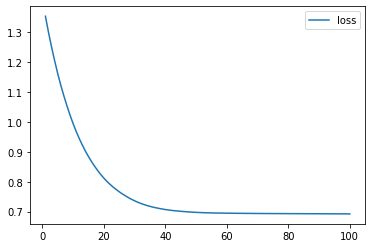

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

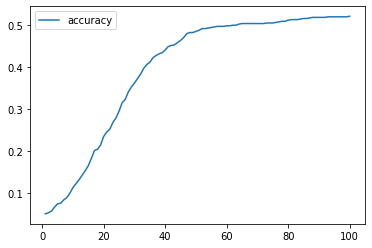

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6933 - accuracy: 0.4800 - 189ms/epoch - 24ms/step
Loss: 0.6932811141014099, Accuracy: 0.47999998927116394


In [ ]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")


1/1 [==============================] - 0s 108ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

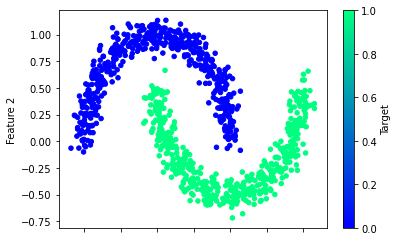

In [ ]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [ ]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [ ]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6490 - accuracy: 0.8107
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.8293
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.8400
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.8440
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.8453
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.8547
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.8560
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.8587
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.8627
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.8613
Epoch 11/

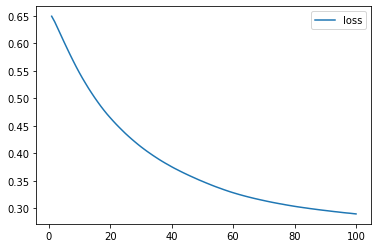

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

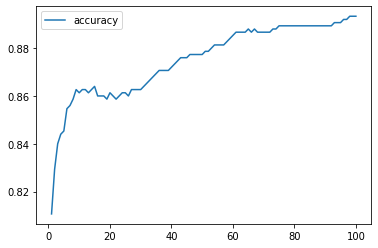

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [ ]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [ ]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7527 - accuracy: 0.3640
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7234 - accuracy: 0.3907
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4227
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.4480
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.4720
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.4987
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.5280
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.5573
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.5840
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.6227
Epoch 11/